# Group 061 Final Project : Traffic Collisions in San Diego

# Data Science Questions

What are the most dangerous places and times to drive throughout the year? More specifically, we are curious about which factors in particular can predict the likelihood of accidents occurring. We know there are probably certain factors that predict accident likelihood, listed below in the hypothesis, however we would like to see through our data analysis if there may be other factors that predict accident likelihood.

# Hypothesis
We believe that there are a number of factors that are likely to predict a higher probability of accidents in certain areas. These factors include:
- The time of day - Based on influences such as low visibility and drowsiness, it is likely that accidents are more likely to occur at night.
- Time of the year -  During the holidays there tends to be more people on the roads and increased instances of DUI, there is likely to be increased accidents during these times.
- Police presence - People tend to drive slower and more carefully around police cars and more diligent in obeying traffic laws. Therefore accidents, especially those involving traffic violations are less likely to occur in areas of higher police presence.
- Quality of road infrastructure - Indicators of bad road infrastructure and maintenance such as potholes or unclear or deteriorating road indicators and signs are likely to cause either confusion or loss of control while driving, therefore leading to increased instances of traffic collisions.
- Location - there are a number of effects of living or driving in a certain location whether it be the average age of the people in the group, the buildings in the area (day life and nightlife), and possibly the type of people who live in that area (single, married, family, young adults)


# Imports

In [1]:
import pandas as pd # DataFrames, Series
import numpy as np # Math Module
import matplotlib.pyplot as plt # Plotting
import seaborn as sns # Plotting
import datetime # Datetime 
from dateutil.parser import parse # String Conversion to Datetime
import folium # Folium Map
from folium import plugins # Folium Heatmap
from pygeocoder import Geocoder # Geocoding
import json # Reading JSON files
import re # Regular Expressions
import matplotlib
from IPython.display import display

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16, 9)

# Reading Data

In [2]:
df = pd.read_csv('Datasets/pd_collisions_datasd_v1.csv')

In [3]:
df.head()

,report_id,date_time,police_beat,address_number_primary,address_pd_primary,address_road_primary,address_sfx_primary,address_pd_intersecting,address_name_intersecting,address_sfx_intersecting,violation_section,violation_type,charge_desc,injured,killed,hit_run_lvl
0,170082,2017-01-01 00:01:00,935,5500,,VALERIO,TRAIL,,,,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0,0,MISDEMEANOR
1,170101,2017-01-01 00:01:00,322,6400,,CRAWFORD,STREET,,,,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0,0,MISDEMEANOR
2,170166,2017-01-01 00:01:00,124,8300,,CAM DEL ORO,,,,,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0,0,MISDEMEANOR
3,170218,2017-01-01 00:01:00,325,8100,,ROYAL GORGE,DRIVE,,,,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,0,0,MISDEMEANOR
4,170097,2017-01-01 01:00:00,521,1000,,11TH,AVENUE,,,,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,0,0,MISDEMEANOR


# Location

## Extraction of Locations from Dataset

In [4]:

addresses = df.apply(lambda x : ' '.join(
    str(i).strip() for i in [x.address_number_primary, x.address_pd_primary, x.address_road_primary, x.address_sfx_primary] 
) + ', SAN DIEGO', axis = 1)


In [5]:
addresses.shape

(28595,)

## Geocoding

Since API calls take a lot of time, we delegated this task to an external file called `GeoEncoding.py` and saved all the data to `Datasets/locations.csv` so that this data is easily accessible.

In [6]:
NUM_POINTS = 500

locations = pd.read_csv('Datasets/locations.csv')
locations = locations['Coordinates'][:NUM_POINTS]

In [7]:
LAT, LON = 0, 1 
center = np.mean(locations.apply(lambda x : float(x[ x.find('(') + 1 : x.find(',') ]))), np.mean(locations.apply(lambda x : float(x[ x.find(',') + 1 : x.find(')') ])))

center

(32.7825012288, -117.1447727882)

## Map

In [8]:
# Creating map
m = folium.Map(center, zoom_start = 11)

### Mark each point

In [9]:
for location in locations:
    lat = float(location[ location.find('(') + 1 : location.find(',') ])
    lon = float(location[ location.find(',') + 1 : location.find(')') ])
    folium.CircleMarker([lat, lon],
                        radius=15,
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)
display(m)

### Creating Heatmap

In [10]:
# New Map
mh = folium.Map(center, zoom_start = 11)

In [11]:
points_df = pd.DataFrame({

    'latitude': list(locations.apply(lambda x : float(x[ x.find('(') + 1 : x.find(',') ]))),
    'longitude': list(locations.apply(lambda x : float(x[ x.find(',') + 1 : x.find(')') ])))
})

mh.add_child(plugins.HeatMap(points_df.values, radius = 20))
mh

## EDA

#### Dataset Description:

In this project, we are using the car collision dataset from San Diego Government Web Page. We are using their user-related data form 2017 to 2019. We use the data from all months to analysis the collision pattern within all counties of San Diego. 


The reason of why we chose this dataset is that this data set contains information of collisions from the whole San Diego City, which has a large amount of population for our analysis. Also, this dataset is an official dataset, which means that its information is relatively accurate.


The dataset includes 16 different features in a total of 28595 data entries.


*report_id* : The unique ID of the report of each accident.

*data_time* : The date and time of the accident.

*police_beat* : The territory and time that a police officer patrols.

*address_number_primary* : The primary address number.

*address_pd_primary* : The primary address direction (W/S/N/E).

*address_road_primary* : The primary road name.

*address_sfx_primary* & *address_pd_intersecting* & *address_name_intersecting* & *address_sfx_intersecting* : Other address information.

*violation_section* : California Vehicle Code Violations.

https://www.dmv.ca.gov/portal/dmv/?1dmy&urile=wcm:path:/dmv_content_en/dmv/dl/vioptct

*violation_type* : The Type of Violation (VC/PC/MC/ZZ/CO/HS)

*charge_desc* : The charge description, which descripts each charge. Based on the research, the description is based on the violation section.

*injured* : Number of injuries( Max: 180, Min: 0, Mean: 0.59 )

*killed* : Number of Death( Max: 3, Min: 0, Mean: 0.00465 )

*hit_run_lvl*: Level of severity if the collsion is a hit-run. (MISDEMEANOR/FELONY)


First, check the missingness of the dataset:

In [12]:
df.isnull().sum()/28595

report_id                    0.000000
date_time                    0.000000
police_beat                  0.000000
address_number_primary       0.000000
address_pd_primary           0.000000
address_road_primary         0.000000
address_sfx_primary          0.000140
address_pd_intersecting      0.000000
address_name_intersecting    0.000000
address_sfx_intersecting     0.000350
violation_section            0.000000
violation_type               0.000000
charge_desc                  0.000000
injured                      0.000000
killed                       0.000000
hit_run_lvl                  0.533905
dtype: float64

We noticed that there is a significant amount of missing values in hit_run_lvl, which is around 53.3905% of the total entries. Hence, we print out unique values of hit_run_lvl:

In [13]:
df.hit_run_lvl.unique()

array(['MISDEMEANOR', nan, 'FELONY'], dtype=object)

There are only three unique values, and two of them represent levels of severity of hit-run collisions, and the other one represents it is not a hit-run. Hence, its missing type is missing by design (MD). We should not impute it since it is designed to miss.

# Time of Year

## Extraction of Date from Dataset

*I was thinking for this chart we label the bottom axis by date or month/year something like that
Also I'd like to have a graph maybe like this one that shows average crashes per day on a given date maybe
then it would look a little more clean and be easier to show how crash frequency fluctuates throughout the year*

In [14]:
dates = df['date_time'].apply(lambda s : parse(re.search(r'[0-9]{4}-[0-9]{2}-[0-9]{2}', s).group()))

In [15]:
# Getting number of crashes per day
crashes_per_day = dates.apply(lambda date : (date - datetime.datetime(2017, 1, 1)).days).value_counts().sort_index()

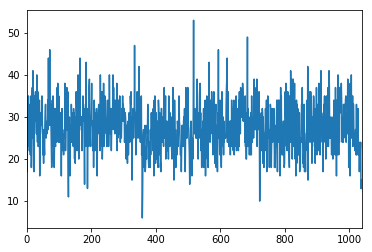

In [16]:
crashes_per_day.plot(kind = 'line')

In [17]:
dates17 = df['date_time'].apply(lambda s : parse(re.search(r'[0-9]{4}-[0-9]{2}-[0-9]{2}', s).group()))
dates17 = dates17.value_counts().sort_index().loc['2017-01-01':'2017-12-31']
dates18 = df['date_time'].apply(lambda s : parse(re.search(r'[0-9]{4}-[0-9]{2}-[0-9]{2}', s).group()))
dates18 = dates18.value_counts().sort_index().loc['2018-01-01':'2018-12-31']

dates19 = df['date_time'].apply(lambda s : parse(re.search(r'[0-9]{4}-[0-9]{2}-[0-9]{2}', s).group()))
dates19 = dates19.value_counts().sort_index().loc['2019-01-01':'2019-11-05']

Avg crashes in 2017: 28.052054794520547

NY Day: 30
St Patrick's Day: 28
Cinco de Mayo: 37
4th July: 43
Thanksgiving: 15
Xmas Eve: 23
Xmas: 6
NY Eve: 23


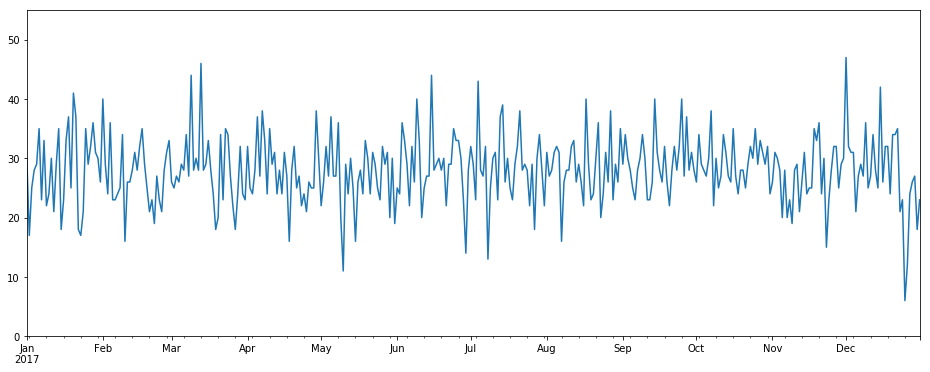

In [18]:
dates17.plot(kind='line', figsize=(16,6)).set_ylim(0,55)

print("Avg crashes in 2017: " + str(np.mean(dates17)) + "\n")

print("NY Day: " + str(dates17['2017-01-01']))
print("St Patrick's Day: " + str(dates17['2017-03-17']))
print("Cinco de Mayo: " + str(dates17['2017-05-05']))
print("4th July: " + str(dates17['2017-07-04']))
print("Thanksgiving: " + str(dates17['2017-11-23']))
print("Xmas Eve: " + str(dates17['2017-12-24']))
print("Xmas: " + str(dates17['2017-12-25']))
print("NY Eve: " + str(dates17['2017-12-31']))

Avg crashes in 2018: 27.13972602739726

NY Day: 26
St Patrick's Day: 35
Cinco de Mayo: 32
4th July: 18
Thanksgiving: 21
Xmas Eve: 10
Xmas: 17
NY Eve: 22


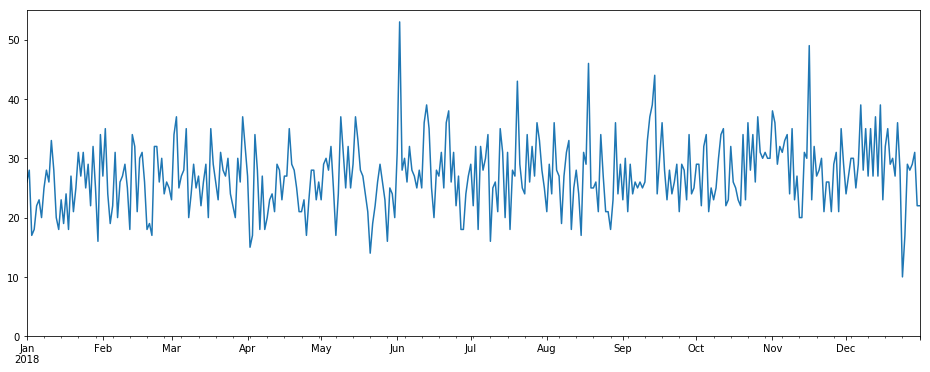

In [19]:
dates18.plot(kind='line', figsize=(16,6)).set_ylim(0,55)

print("Avg crashes in 2018: " + str(np.mean(dates18)) + "\n")

print("NY Day: " + str(dates18['2018-01-01']))
print("St Patrick's Day: " + str(dates18['2018-03-17']))
print("Cinco de Mayo: " + str(dates18['2018-05-05']))
print("4th July: " + str(dates18['2018-07-04']))
print("Thanksgiving: " + str(dates18['2018-11-22']))
print("Xmas Eve: " + str(dates18['2018-12-24']))
print("Xmas: " + str(dates18['2018-12-25']))
print("NY Eve: " + str(dates18['2018-12-31']))

Avg crashes in 2019: 28.052054794520547



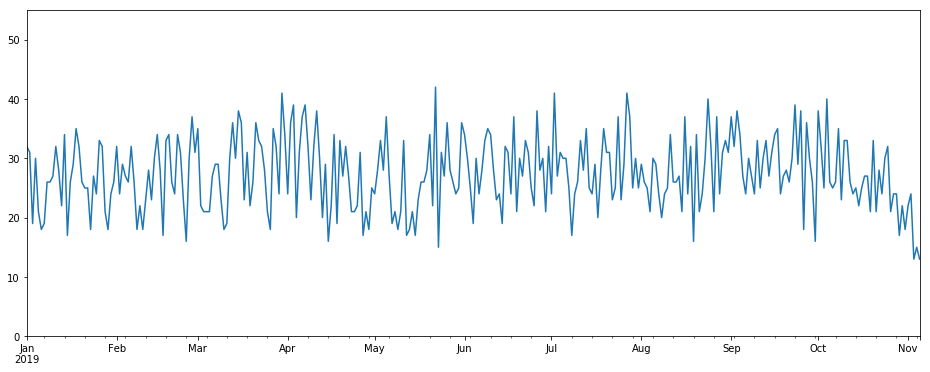

In [20]:
dates19.plot(kind='line', figsize=(16,6)).set_ylim(0,55)

print("Avg crashes in 2019: " + str(np.mean(dates17)) + "\n")

# The Time of Day

FIrst, we will group the dataframe by hours and minutes to see if there are any significantly high or low counts during any specific time periods.

In [21]:
times = pd.to_datetime(df.date_time)
df_td = df.copy()
df_td.date_time = times

           report_id
date_time           
(0, 0)           263
(0, 1)          1106
(0, 2)             8
(0, 3)             6
(0, 4)            11
...              ...
(23, 55)          19
(23, 56)           9
(23, 57)           4
(23, 58)          12
(23, 59)          15

[1431 rows x 1 columns]


(0, 1200)

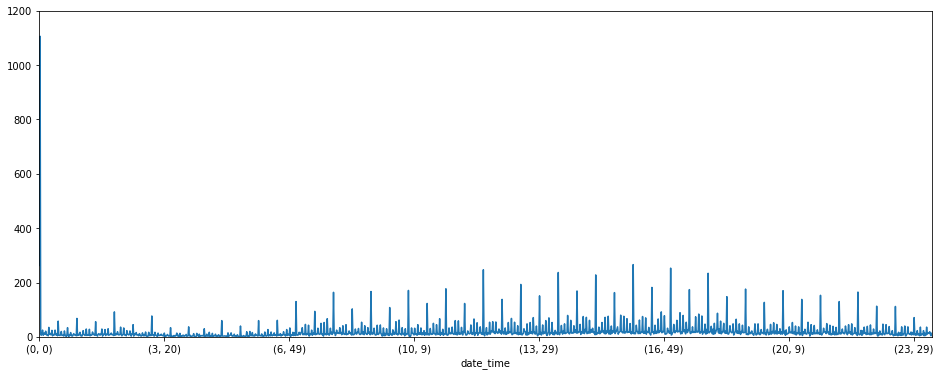

In [22]:
grp = df_td.groupby(by=[df_td.date_time.map(lambda x : (x.hour,x.minute))])
df_grp_minute = grp.count()
df_grp_minute = df_grp_minute[df_grp_minute.columns[:1]]
print(df_grp_minute)
df_grp_minute.report_id.plot(kind='line', figsize=(16,6)).set_ylim(0,1200)
# The (0,0) and (0,1) are two very weird hour-minute pair, I think we should drop them.

We noticed a significantly high amount of car crashed happening around 1 AM, with a value of 1106. The information does not make sense since it has a huge gap comparing to other time periods. Hence, we decide to __________ (I am not sure what to do)

After, we group the dataframe by ONLY hours to visualize the amount of car crushed in different time periods in a day.

(0, 2100)

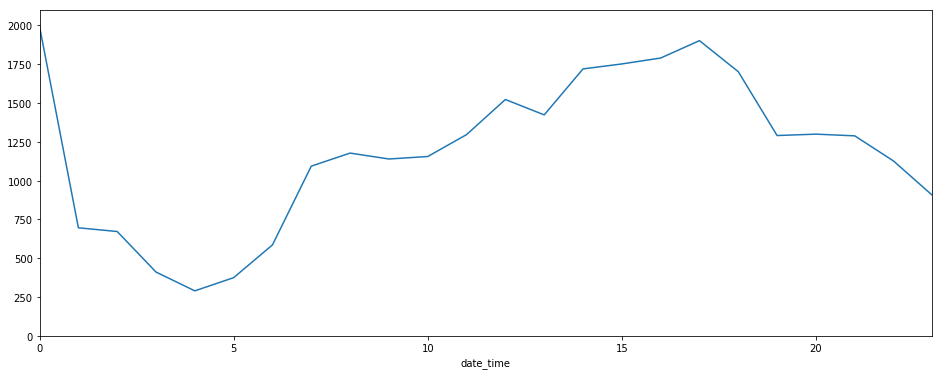

In [23]:
grp = df_td.groupby(by=[df_td.date_time.map(lambda x : (x.hour))])
df_grp = grp.count()
df_grp = df_grp[df_grp.columns[:1]]
df_grp.report_id.plot(kind='line', figsize=(16,6)).set_ylim(0,2100)